In [1]:
import pydub
import pandas as pd
import librosa as lb
import numpy as np
import os
import random
from linetimer import CodeTimer

In [2]:
def osPath(path):
    return os.path.abspath(path)

In [22]:
pathname = "data/data files/validated.tsv"
output_pathname = "data/data files/validated_SpeechFeatures.tsv"
os.environ["PATH"] += os.pathsep + 'FFMPEG/bin'
mp3_folder = "data/clips"
wav_folder = "data/wav_clips"

# Feature Extraction

In [4]:
filepath = "data/data files/validated"
filenames = ["_fr"]
for filename in filenames:
    df = pd.read_csv(str(filepath + filename + ".tsv"), sep="\t")
    df = df.dropna(subset=["gender"])
    df = df[["up_votes","down_votes","path", "age", "gender","accent"]]
    column_chroma_stft = [] #chromagram https://en.wikipedia.org/wiki/Chroma_feature
    column_rms = [] #root mean square https://en.wikipedia.org/wiki/Root_mean_square#In_common_waveforms
    column_spec_cent = [] #spectral centroid https://en.wikipedia.org/wiki/Spectral_centroid
    column_spec_bw = [] #spectral bandwidth https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)#x_dB_bandwidth
    column_rolloff = [] #spectral roll-off https://en.wikipedia.org/wiki/Roll-off
    column_zcr = [] #zero-crossing rate https://en.wikipedia.org/wiki/Zero-crossing_rate
    column_mfcc1 = [] #Mel-frequency cepstrum coefficients https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
    column_mfcc2 = []
    column_mfcc3 = []
    column_mfcc4 = []
    column_mfcc5 = []
    column_mfcc6 = []
    column_mfcc7 = []
    column_mfcc8 = []
    column_mfcc9 = []
    column_mfcc10 = []
    column_mfcc11 = []
    column_mfcc12 = []
    column_mfcc13 = []
    column_mfcc14 = []
    column_mfcc15 = []
    column_mfcc16 = []
    column_mfcc17 = []
    column_mfcc18 = []
    column_mfcc19 = []
    column_mfcc20 = []
    wav_FilePaths = []
    mp3_FileNames = []
    dir = os.fsdecode(wav_folder)
    for path in os.listdir(dir):
        src = os.path.join(dir, path)
        name = path[:-3] + str("mp3")
        wav_FilePaths.append(src)
        mp3_FileNames.append(name)
    df = df[df["path"].isin(mp3_FileNames)]
    dictionary = dict(zip(mp3_FileNames, wav_FilePaths))
    df["path"] = df["path"].map(dictionary)
    for index, row in df.iterrows():
        y, sr = lb.load(osPath(row.path))

        chroma_stft = np.mean(lb.feature.chroma_stft(y=y, sr=sr))
        #https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html
        rms = np.mean(lb.feature.rms(y=y))
        #https://librosa.github.io/librosa/generated/librosa.feature.rms.html
        spec_cent = np.mean(lb.feature.spectral_centroid(y=y, sr=sr))
        #https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html
        spec_bw = np.mean(lb.feature.spectral_bandwidth(y=y, sr=sr))
        #https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html
        rolloff = np.mean(lb.feature.spectral_rolloff(y=y, sr=sr))
        #https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html
        zcr = np.mean(lb.feature.zero_crossing_rate(y))
        #https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html
        mfcc = lb.feature.mfcc(y=y, sr=sr)
        #https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html

        column_chroma_stft.append(chroma_stft)
        column_rms.append(rms)
        column_spec_cent.append(spec_cent)
        column_spec_bw.append(spec_bw)
        column_rolloff.append(rolloff)
        column_zcr.append(zcr)

        column_mfcc1.append(np.mean(mfcc[0]))
        column_mfcc2.append(np.mean(mfcc[1]))
        column_mfcc3.append(np.mean(mfcc[2]))
        column_mfcc4.append(np.mean(mfcc[3]))
        column_mfcc5.append(np.mean(mfcc[4]))
        column_mfcc6.append(np.mean(mfcc[5]))
        column_mfcc7.append(np.mean(mfcc[6]))
        column_mfcc8.append(np.mean(mfcc[7]))
        column_mfcc9.append(np.mean(mfcc[8]))
        column_mfcc10.append(np.mean(mfcc[9]))
        column_mfcc11.append(np.mean(mfcc[10]))
        column_mfcc12.append(np.mean(mfcc[11]))
        column_mfcc13.append(np.mean(mfcc[12]))
        column_mfcc14.append(np.mean(mfcc[13]))
        column_mfcc15.append(np.mean(mfcc[14]))
        column_mfcc16.append(np.mean(mfcc[15]))
        column_mfcc17.append(np.mean(mfcc[16]))
        column_mfcc18.append(np.mean(mfcc[17]))
        column_mfcc19.append(np.mean(mfcc[18]))
        column_mfcc20.append(np.mean(mfcc[19]))
        
    df = df.assign(chroma_stft=column_chroma_stft)
    df = df.assign(rms=column_rms)
    df = df.assign(spec_cent=column_spec_cent)
    df = df.assign(spec_bw=column_spec_bw)
    df = df.assign(rolloff=column_rolloff)
    df = df.assign(zcr=column_zcr)

    df = df.assign(mfcc1=column_mfcc1)
    df = df.assign(mfcc2=column_mfcc2)
    df = df.assign(mfcc3=column_mfcc3)
    df = df.assign(mfcc4=column_mfcc4)
    df = df.assign(mfcc5=column_mfcc5)
    df = df.assign(mfcc6=column_mfcc6)
    df = df.assign(mfcc7=column_mfcc7)
    df = df.assign(mfcc8=column_mfcc8)
    df = df.assign(mfcc9=column_mfcc9)
    df = df.assign(mfcc10=column_mfcc10)
    df = df.assign(mfcc11=column_mfcc11)
    df = df.assign(mfcc12=column_mfcc12)
    df = df.assign(mfcc13=column_mfcc13)
    df = df.assign(mfcc14=column_mfcc14)
    df = df.assign(mfcc15=column_mfcc15)
    df = df.assign(mfcc16=column_mfcc16)
    df = df.assign(mfcc17=column_mfcc17)
    df = df.assign(mfcc18=column_mfcc18)
    df = df.assign(mfcc19=column_mfcc19)
    df = df.assign(mfcc20=column_mfcc20)
    
    df.to_csv(str(filepath + filename + "_SpeechFeatures.tsv"), encoding="utf-8", sep="\t", index=False)

In [ ]:
df = pd.read_csv(pathname, sep="\t")
df

In [ ]:
df = df.dropna(subset=["age","gender","accent"]) # This will DEFINITELY lead to a smaller sample size and less reliable results, but for simplicity's and comparison's sake, let's only go with the data that also includes accents and ages.

# df = df[df.gender != "other"] # Let's not remove these right away. We can run an experiment on whether models are affected by this or not.

df = df[["up_votes","down_votes","path", "age", "gender","accent"]] # Might be a good idea to keep up_votes nad down_votes as well, so I added these.

df

In [ ]:
# New Columns
column_chroma_stft = [] #chromagram https://en.wikipedia.org/wiki/Chroma_feature
column_rms = [] #root mean square https://en.wikipedia.org/wiki/Root_mean_square#In_common_waveforms
column_spec_cent = [] #spectral centroid https://en.wikipedia.org/wiki/Spectral_centroid
column_spec_bw = [] #spectral bandwidth https://en.wikipedia.org/wiki/Bandwidth_(signal_processing)#x_dB_bandwidth
column_rolloff = [] #spectral roll-off https://en.wikipedia.org/wiki/Roll-off
column_zcr = [] #zero-crossing rate https://en.wikipedia.org/wiki/Zero-crossing_rate
column_mfcc1 = [] #Mel-frequency cepstrum coefficients https://en.wikipedia.org/wiki/Mel-frequency_cepstrum
column_mfcc2 = []
column_mfcc3 = []
column_mfcc4 = []
column_mfcc5 = []
column_mfcc6 = []
column_mfcc7 = []
column_mfcc8 = []
column_mfcc9 = []
column_mfcc10 = []
column_mfcc11 = []
column_mfcc12 = []
column_mfcc13 = []
column_mfcc14 = []
column_mfcc15 = []
column_mfcc16 = []
column_mfcc17 = []
column_mfcc18 = []
column_mfcc19 = []
column_mfcc20 = []

In [ ]:
# Get all audio file paths and names
wav_FilePaths = []
mp3_FileNames = []
dir = os.fsdecode(wav_folder)
for path in os.listdir(dir):
    src = os.path.join(dir, path)
    name = path[:-3] + str("mp3")
    wav_FilePaths.append(src)
    mp3_FileNames.append(name)

In [ ]:
# Remove all entries from dataframe where we don't have the given audio file
df = df[df["path"].isin(mp3_FileNames)]
dictionary = dict(zip(mp3_FileNames, wav_FilePaths))
df["path"] = df["path"].map(dictionary)

In [ ]:
df

In [ ]:
# Get speech features, add them to the dataframe and export to csv file
for index, row in df.iterrows():
    y, sr = lb.load(osPath(row.path))

    chroma_stft = np.mean(lb.feature.chroma_stft(y=y, sr=sr))
    #https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html
    rms = np.mean(lb.feature.rms(y=y))
    #https://librosa.github.io/librosa/generated/librosa.feature.rms.html
    spec_cent = np.mean(lb.feature.spectral_centroid(y=y, sr=sr))
    #https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html
    spec_bw = np.mean(lb.feature.spectral_bandwidth(y=y, sr=sr))
    #https://librosa.github.io/librosa/generated/librosa.feature.spectral_bandwidth.html
    rolloff = np.mean(lb.feature.spectral_rolloff(y=y, sr=sr))
    #https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html
    zcr = np.mean(lb.feature.zero_crossing_rate(y))
    #https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html
    mfcc = lb.feature.mfcc(y=y, sr=sr)
    #https://librosa.github.io/librosa/generated/librosa.feature.mfcc.html

    column_chroma_stft.append(chroma_stft)
    column_rms.append(rms)
    column_spec_cent.append(spec_cent)
    column_spec_bw.append(spec_bw)
    column_rolloff.append(rolloff)
    column_zcr.append(zcr)

    column_mfcc1.append(np.mean(mfcc[0]))
    column_mfcc2.append(np.mean(mfcc[1]))
    column_mfcc3.append(np.mean(mfcc[2]))
    column_mfcc4.append(np.mean(mfcc[3]))
    column_mfcc5.append(np.mean(mfcc[4]))
    column_mfcc6.append(np.mean(mfcc[5]))
    column_mfcc7.append(np.mean(mfcc[6]))
    column_mfcc8.append(np.mean(mfcc[7]))
    column_mfcc9.append(np.mean(mfcc[8]))
    column_mfcc10.append(np.mean(mfcc[9]))
    column_mfcc11.append(np.mean(mfcc[10]))
    column_mfcc12.append(np.mean(mfcc[11]))
    column_mfcc13.append(np.mean(mfcc[12]))
    column_mfcc14.append(np.mean(mfcc[13]))
    column_mfcc15.append(np.mean(mfcc[14]))
    column_mfcc16.append(np.mean(mfcc[15]))
    column_mfcc17.append(np.mean(mfcc[16]))
    column_mfcc18.append(np.mean(mfcc[17]))
    column_mfcc19.append(np.mean(mfcc[18]))
    column_mfcc20.append(np.mean(mfcc[19]))

In [ ]:
# Add columns to dataframe
df = df.assign(chroma_stft=column_chroma_stft)
df = df.assign(rms=column_rms)
df = df.assign(spec_cent=column_spec_cent)
df = df.assign(spec_bw=column_spec_bw)
df = df.assign(rolloff=column_rolloff)
df = df.assign(zcr=column_zcr)

df = df.assign(mfcc1=column_mfcc1)
df = df.assign(mfcc2=column_mfcc2)
df = df.assign(mfcc3=column_mfcc3)
df = df.assign(mfcc4=column_mfcc4)
df = df.assign(mfcc5=column_mfcc5)
df = df.assign(mfcc6=column_mfcc6)
df = df.assign(mfcc7=column_mfcc7)
df = df.assign(mfcc8=column_mfcc8)
df = df.assign(mfcc9=column_mfcc9)
df = df.assign(mfcc10=column_mfcc10)
df = df.assign(mfcc11=column_mfcc11)
df = df.assign(mfcc12=column_mfcc12)
df = df.assign(mfcc13=column_mfcc13)
df = df.assign(mfcc14=column_mfcc14)
df = df.assign(mfcc15=column_mfcc15)
df = df.assign(mfcc16=column_mfcc16)
df = df.assign(mfcc17=column_mfcc17)
df = df.assign(mfcc18=column_mfcc18)
df = df.assign(mfcc19=column_mfcc19)
df = df.assign(mfcc20=column_mfcc20)

In [ ]:
df.to_csv(output_pathname, encoding="utf-8", sep="\t", index=False)

In [ ]:
df

# Unsure we're handling some features correctly
## Or what does it mean to take means

In [5]:
from matplotlib import pyplot as plt
import pydub
from pydub import AudioSegment
from pydub.playback import play
import pandas as pd
import librosa as lb
import librosa.display
import numpy as np
import os

C:\Users\Risto\Anaconda3\lib\site-packages\pydub\utils.py:179: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [6]:
def librosaFeatureDisplay(feature,title):
    plt.figure(figsize=(20,10))
    lb.display.specshow(feature)
    plt.title(title)
    plt.show()
    print("mean",np.mean(feature))
    print("standard deviation",np.std(feature))

In [7]:
df = pd.read_csv(output_pathname, encoding="utf-8", sep="\t")
df

,up_votes,down_votes,path,age,gender,accent,chroma_stft,rms,spec_cent,spec_bw,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,2,1,data/wav_clips\common_voice_en_125399.wav,seventies,female,england,0.365858,0.115715,749.461161,1098.897685,...,-2.856971,-3.027623,-4.218188,-3.524858,-2.171703,-3.582045,-6.109649,-4.734843,-3.389881,-3.896086
1,2,0,data/wav_clips\common_voice_en_1100186.wav,sixties,male,african,0.410334,0.040648,2267.620595,2404.396326,...,-10.669424,-1.874942,-4.879779,-1.593734,-4.482958,-0.079174,-7.289438,0.110350,-5.070335,-0.253545
2,2,0,data/wav_clips\common_voice_en_1272597.wav,twenties,male,indian,0.345455,0.031659,1612.923649,1703.784527,...,-11.175241,12.403630,-0.707115,-10.989146,5.282956,-4.065197,-13.469048,-0.858188,-6.580098,-0.527497
3,2,0,data/wav_clips\common_voice_en_18354220.wav,twenties,female,england,0.321885,0.049650,2182.273597,1690.673251,...,-8.489103,-15.566792,-8.552410,-6.938752,-7.111887,-12.982553,-5.543273,-2.269802,-9.797567,-0.697005
4,2,0,data/wav_clips\common_voice_en_15734801.wav,fourties,male,scotland,0.432749,0.019544,2456.893685,2577.651628,...,-6.922030,4.514844,-8.474165,3.093559,-5.899485,3.682870,-0.608785,-0.272467,-4.542766,2.137483
5,2,1,data/wav_clips\common_voice_en_13643569.wav,seventies,male,us,0.556968,0.047199,3003.980082,2845.405275,...,6.298511,-1.545525,1.914656,4.260598,1.209512,6.071092,-4.060466,3.243502,-0.701524,5.362822
6,2,1,data/wav_clips\common_voice_en_15757435.wav,twenties,male,england,0.344096,0.023608,1690.789408,1547.303004,...,-3.292651,-15.204454,-0.000798,-4.348715,-1.191053,1.527506,-9.502416,-4.400562,-9.168544,-12.023730
7,4,1,data/wav_clips\common_voice_en_106966.wav,seventies,female,us,0.531139,0.002191,2198.639010,2559.337267,...,-2.912038,-0.302183,0.375967,-2.462975,-6.718711,-1.659369,-6.059867,-4.248517,-3.012985,-3.323292
8,2,0,data/wav_clips\common_voice_en_17507716.wav,teens,female,other,0.269595,0.114961,1785.720819,1554.137874,...,-12.025450,-6.061091,-5.963960,-0.858532,-12.246932,-4.106375,-6.313654,-9.611370,-1.317794,-9.443284
9,2,1,data/wav_clips\common_voice_en_159722.wav,fourties,female,us,0.414330,0.038784,2087.945091,2466.205076,...,-1.990287,-4.571713,-4.240748,1.494991,-3.444269,-2.720220,-1.060798,-0.386221,-4.826453,-1.842327


In [8]:
def present_values(row):
    y, sr = lb.load(osPath(row.path))
    plt.figure(figsize=(20,10))
    lb.display.waveplot(y=y, sr=sr)
    plt.title(row.path)
    plt.show()
    print(row.path)
    librosaFeatureDisplay(lb.feature.chroma_stft(y=y, sr=sr),"Chromagram")
    librosaFeatureDisplay(lb.feature.rms(y=y),"Root Mean Square")
    librosaFeatureDisplay(lb.feature.spectral_centroid(y=y, sr=sr),"Spectral Centroid")
    librosaFeatureDisplay(lb.feature.spectral_bandwidth(y=y, sr=sr),"Spectral Bandwidth")
    librosaFeatureDisplay(lb.feature.spectral_rolloff(y=y, sr=sr),"Spectral Rolloff")
    librosaFeatureDisplay(lb.feature.zero_crossing_rate(y),"Zero-Crossing Rate")
    librosaFeatureDisplay(lb.feature.mfcc(y=y, sr=sr),"Mel-Frequency Ceptral Coefficient")

In [9]:
def play_sound(row):
    print("DOESN'T WORK")
    play(AudioSegment.from_wav(osPath(row.path)))

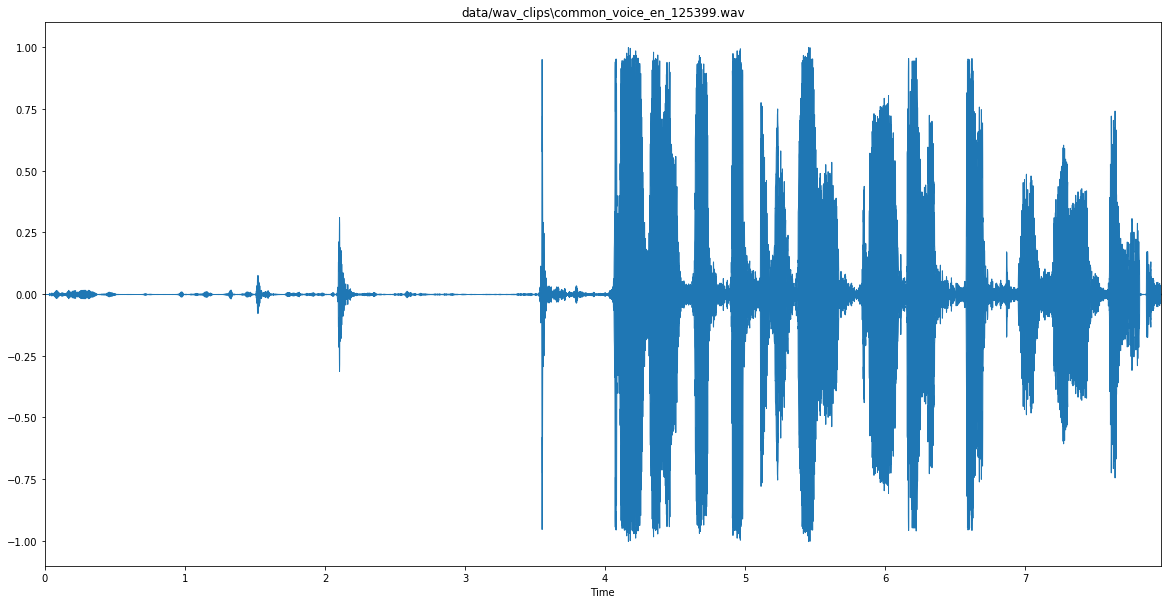

data/wav_clips\common_voice_en_125399.wav


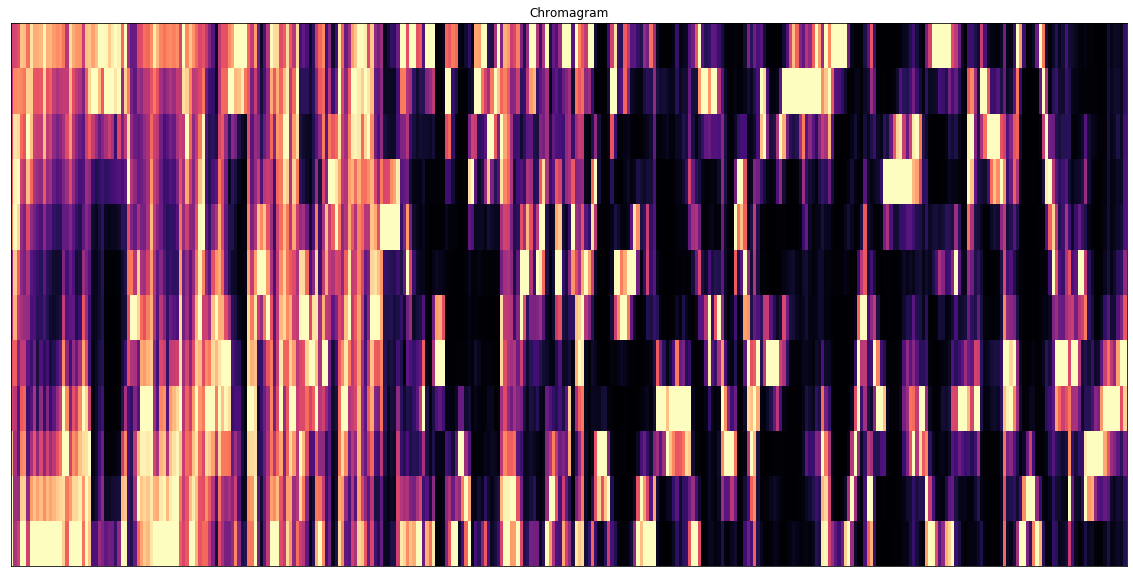

mean 0.36585793
standard deviation 0.33715644


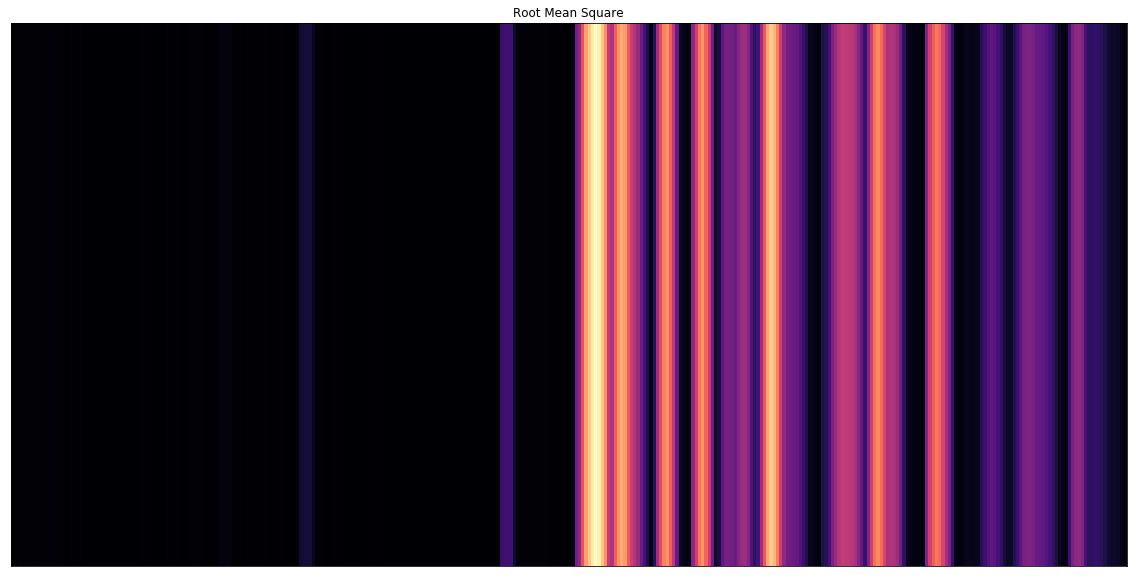

mean 0.115715005
standard deviation 0.1575824


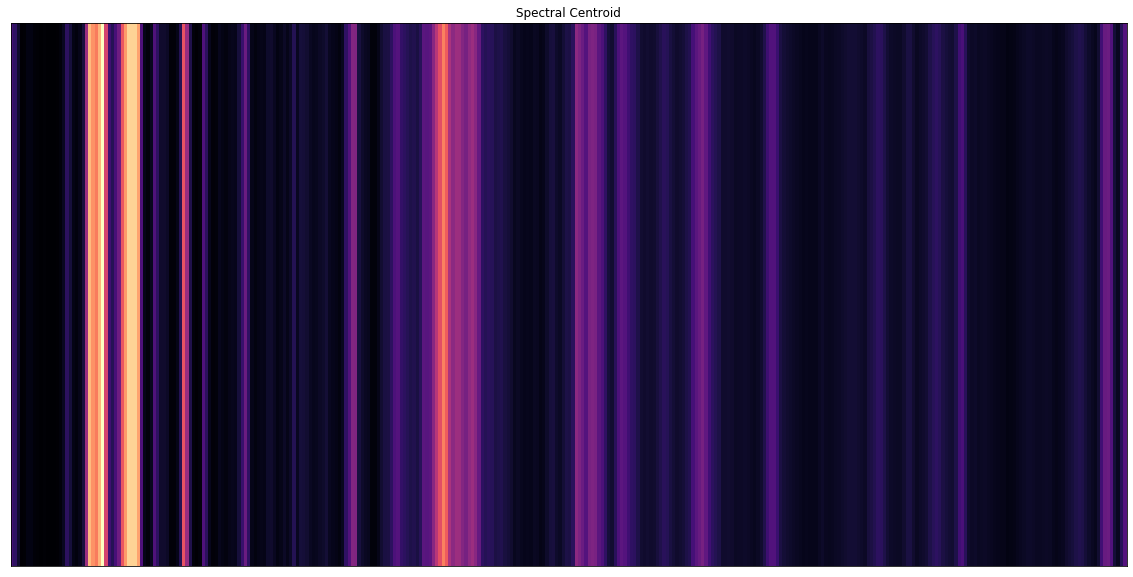

mean 749.461160950667
standard deviation 646.611843851071


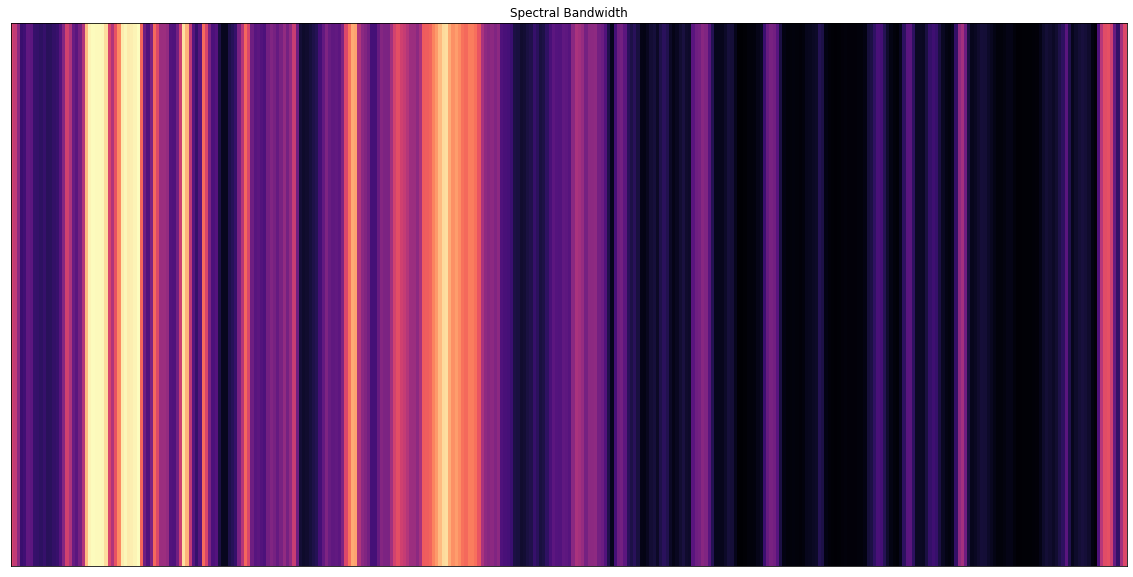

mean 1098.8976852956582
standard deviation 807.5212994511043


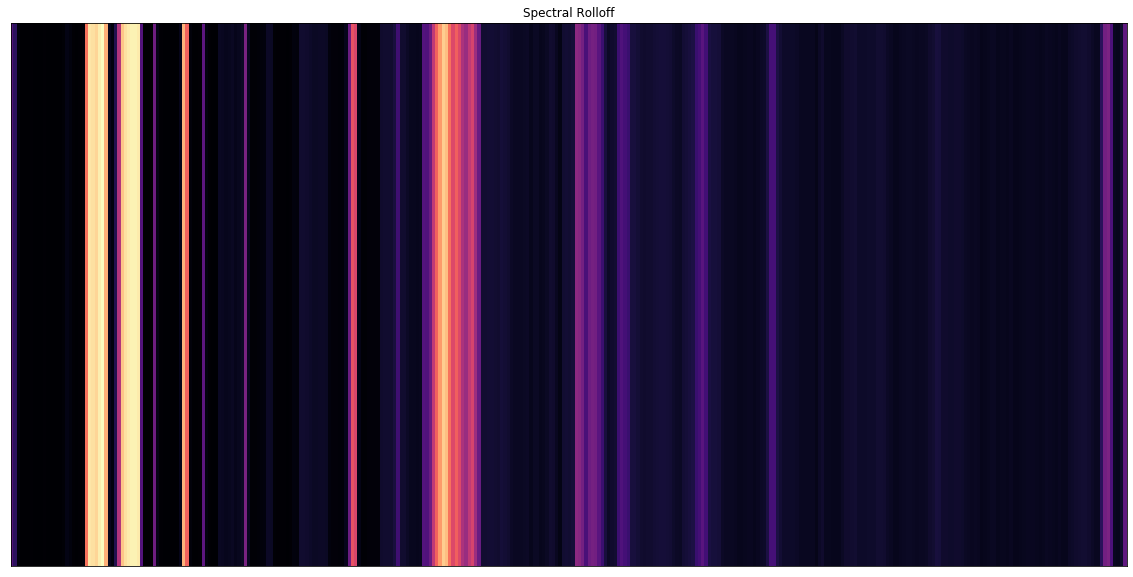

mean 1248.3624125635902
standard deviation 1707.4498782687112


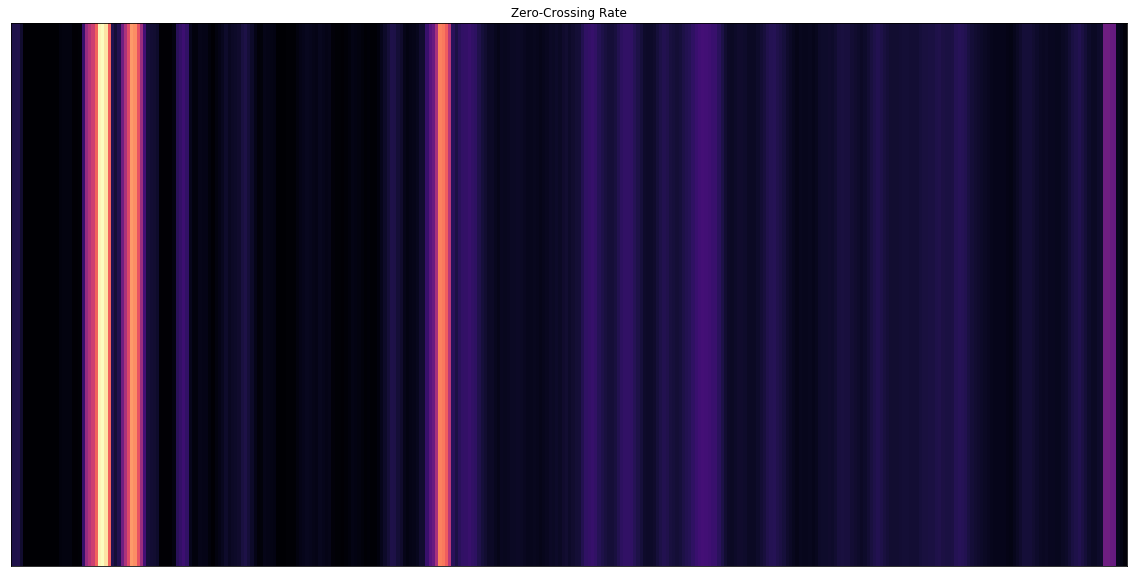

mean 0.04636684683866279
standard deviation 0.050990847107364096


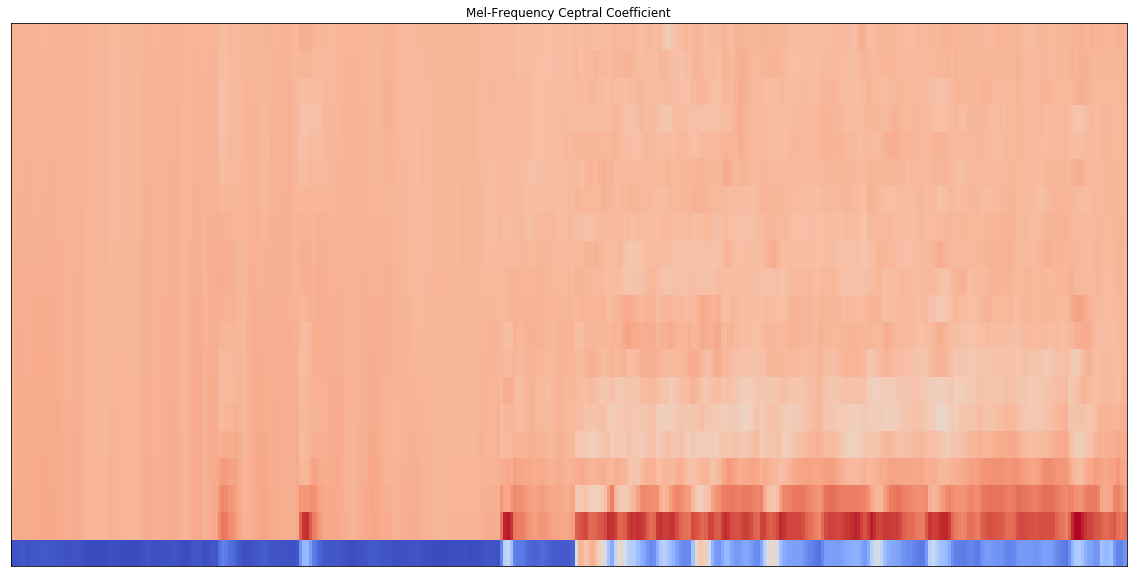

mean -14.32536
standard deviation 89.674675


In [13]:
present_values(df.iloc[0,:])

In [ ]:
play_sound(df.iloc[1,:])

# Modelling

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
plt.style.use('ggplot')

In [24]:
df = pd.read_csv(output_pathname, encoding="utf-8", sep="\t")
df

,up_votes,down_votes,path,age,gender,accent,chroma_stft,rms,spec_cent,spec_bw,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,2,1,data/wav_clips\common_voice_en_125399.wav,seventies,female,england,0.365858,0.115715,749.461161,1098.897685,...,-2.856971,-3.027623,-4.218188,-3.524858,-2.171703,-3.582045,-6.109649,-4.734843,-3.389881,-3.896086
1,2,0,data/wav_clips\common_voice_en_1100186.wav,sixties,male,african,0.410334,0.040648,2267.620595,2404.396326,...,-10.669424,-1.874942,-4.879779,-1.593734,-4.482958,-0.079174,-7.289438,0.110350,-5.070335,-0.253545
2,2,0,data/wav_clips\common_voice_en_1272597.wav,twenties,male,indian,0.345455,0.031659,1612.923649,1703.784527,...,-11.175241,12.403630,-0.707115,-10.989146,5.282956,-4.065197,-13.469048,-0.858188,-6.580098,-0.527497
3,2,0,data/wav_clips\common_voice_en_18354220.wav,twenties,female,england,0.321885,0.049650,2182.273597,1690.673251,...,-8.489103,-15.566792,-8.552410,-6.938752,-7.111887,-12.982553,-5.543273,-2.269802,-9.797567,-0.697005
4,2,0,data/wav_clips\common_voice_en_15734801.wav,fourties,male,scotland,0.432749,0.019544,2456.893685,2577.651628,...,-6.922030,4.514844,-8.474165,3.093559,-5.899485,3.682870,-0.608785,-0.272467,-4.542766,2.137483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35820,2,0,data/wav_clips\common_voice_en_18819172.wav,sixties,male,us,0.452195,0.068775,2612.592851,1936.058494,...,-7.232781,-4.111032,-6.217436,-1.402802,2.498643,-2.035199,-1.859134,-0.168663,-3.004894,3.106332
35821,2,0,data/wav_clips\common_voice_en_18819186.wav,sixties,male,us,0.465885,0.072035,2433.986338,1880.403386,...,-10.912062,-7.812710,-4.335599,-3.157963,1.017951,-3.971588,-2.111831,0.590116,-2.986250,5.327380
35822,2,0,data/wav_clips\common_voice_en_18819325.wav,sixties,male,us,0.496139,0.059773,2899.861998,2069.013057,...,-4.796014,-2.736257,-6.262944,-1.107921,2.475584,-0.847767,-0.785974,0.889395,-2.978726,2.341992
35823,2,0,data/wav_clips\common_voice_en_18822358.wav,sixties,male,us,0.490005,0.055018,2259.298682,1915.028359,...,-16.130146,1.807398,-6.351277,-4.038036,6.428793,-10.838871,1.197704,1.194029,-5.797193,6.492839


# Normalized standard deviation

In [25]:
df.mean()/df.std() #Standard deviation compared to mean

up_votes       0.788525
down_votes     0.215284
chroma_stft    7.014171
rms            1.315038
spec_cent      3.901996
spec_bw        5.337744
rolloff        4.022981
zcr            2.369316
mfcc1         -4.486102
mfcc2          3.406756
mfcc3          0.078225
mfcc4          1.613409
mfcc5          0.203886
mfcc6          0.103276
mfcc7         -0.689030
mfcc8         -0.714478
mfcc9         -1.111779
mfcc10        -0.472391
mfcc11        -1.023371
mfcc12        -0.669068
mfcc13        -0.953135
mfcc14        -0.632351
mfcc15        -0.562931
mfcc16        -0.531897
mfcc17        -1.458798
mfcc18        -0.512257
mfcc19        -1.298967
mfcc20        -0.652222
dtype: float64

# Data Balance

In [26]:
def distribution_plotter(plot_data,feature):
    counts = plot_data[feature].value_counts()
    counts = counts/sum(counts)
    counts.plot(kind="bar")
    plt.title(feature + " distribution")
    plt.show()
    

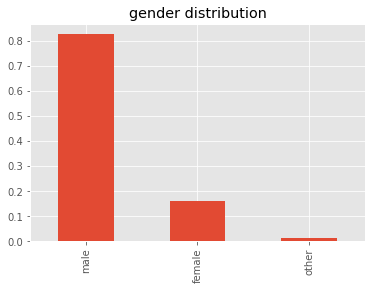

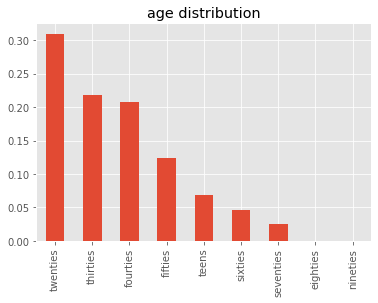

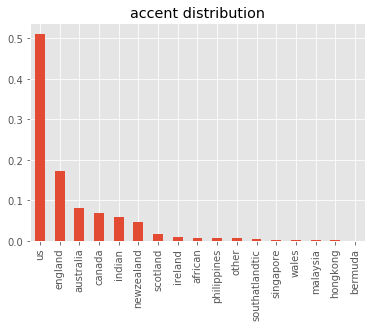

In [27]:
distribution_plotter(df,"gender")
distribution_plotter(df,"age")
distribution_plotter(df,"accent")

### Balancing the Data

In [28]:
minimum_count = 100
data_gender = df.copy()
data_age = df.copy()
data_accent = df.copy()

In [29]:
def dataBalancer(unbalanced_data,feature,floor):
    
    # Removing feature categories that are too small to predict
    counts = unbalanced_data[feature].value_counts()
    for index, value in counts.iteritems():
        if (value < floor):
            unbalanced_data = unbalanced_data[unbalanced_data[feature] != index]
    
    # Taking the largest possible sample of each feature category so that they would be balanced
    counts = unbalanced_data[feature].value_counts()
    lowest_count = min(counts)
    balanced_data = unbalanced_data.copy().head(0)
    for index, value in counts.iteritems():
        index_sample = unbalanced_data[unbalanced_data[feature] == index].sample(lowest_count)
        balanced_data = balanced_data.append(index_sample,ignore_index=True,sort=False)
    
    return balanced_data
    

In [30]:
data_gender = dataBalancer(data_gender,"gender",minimum_count)
data_age = dataBalancer(data_age,"age",minimum_count)
data_accent = dataBalancer(data_accent,"accent",minimum_count)

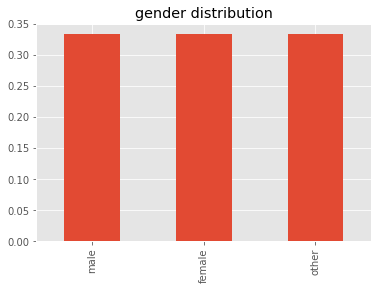

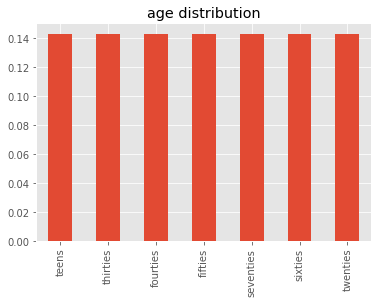

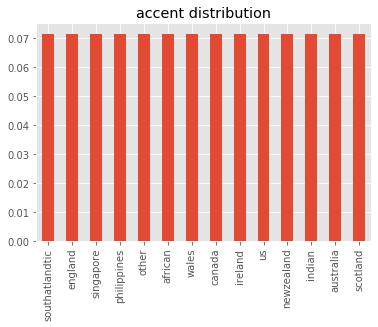

In [31]:
distribution_plotter(data_gender,"gender")
distribution_plotter(data_age,"age")
distribution_plotter(data_accent,"accent")

In [32]:
data_gender.shape

(1239, 32)

# Visualization

In [33]:
from librosa import core

In [42]:
bin_freq = dict()
for f, i in zip(lb.core.mel_to_hz([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]),[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]):
    bin_freq[i+1] = f
    print(str(i+1) + ": " + str(round(f)) + "Hz")

1: 0.0Hz
2: 67.0Hz
3: 133.0Hz
4: 200.0Hz
5: 267.0Hz
6: 333.0Hz
7: 400.0Hz
8: 467.0Hz
9: 533.0Hz
10: 600.0Hz
11: 667.0Hz
12: 733.0Hz
13: 800.0Hz
14: 867.0Hz
15: 933.0Hz
16: 1000.0Hz
17: 1071.0Hz
18: 1147.0Hz
19: 1229.0Hz
20: 1317.0Hz


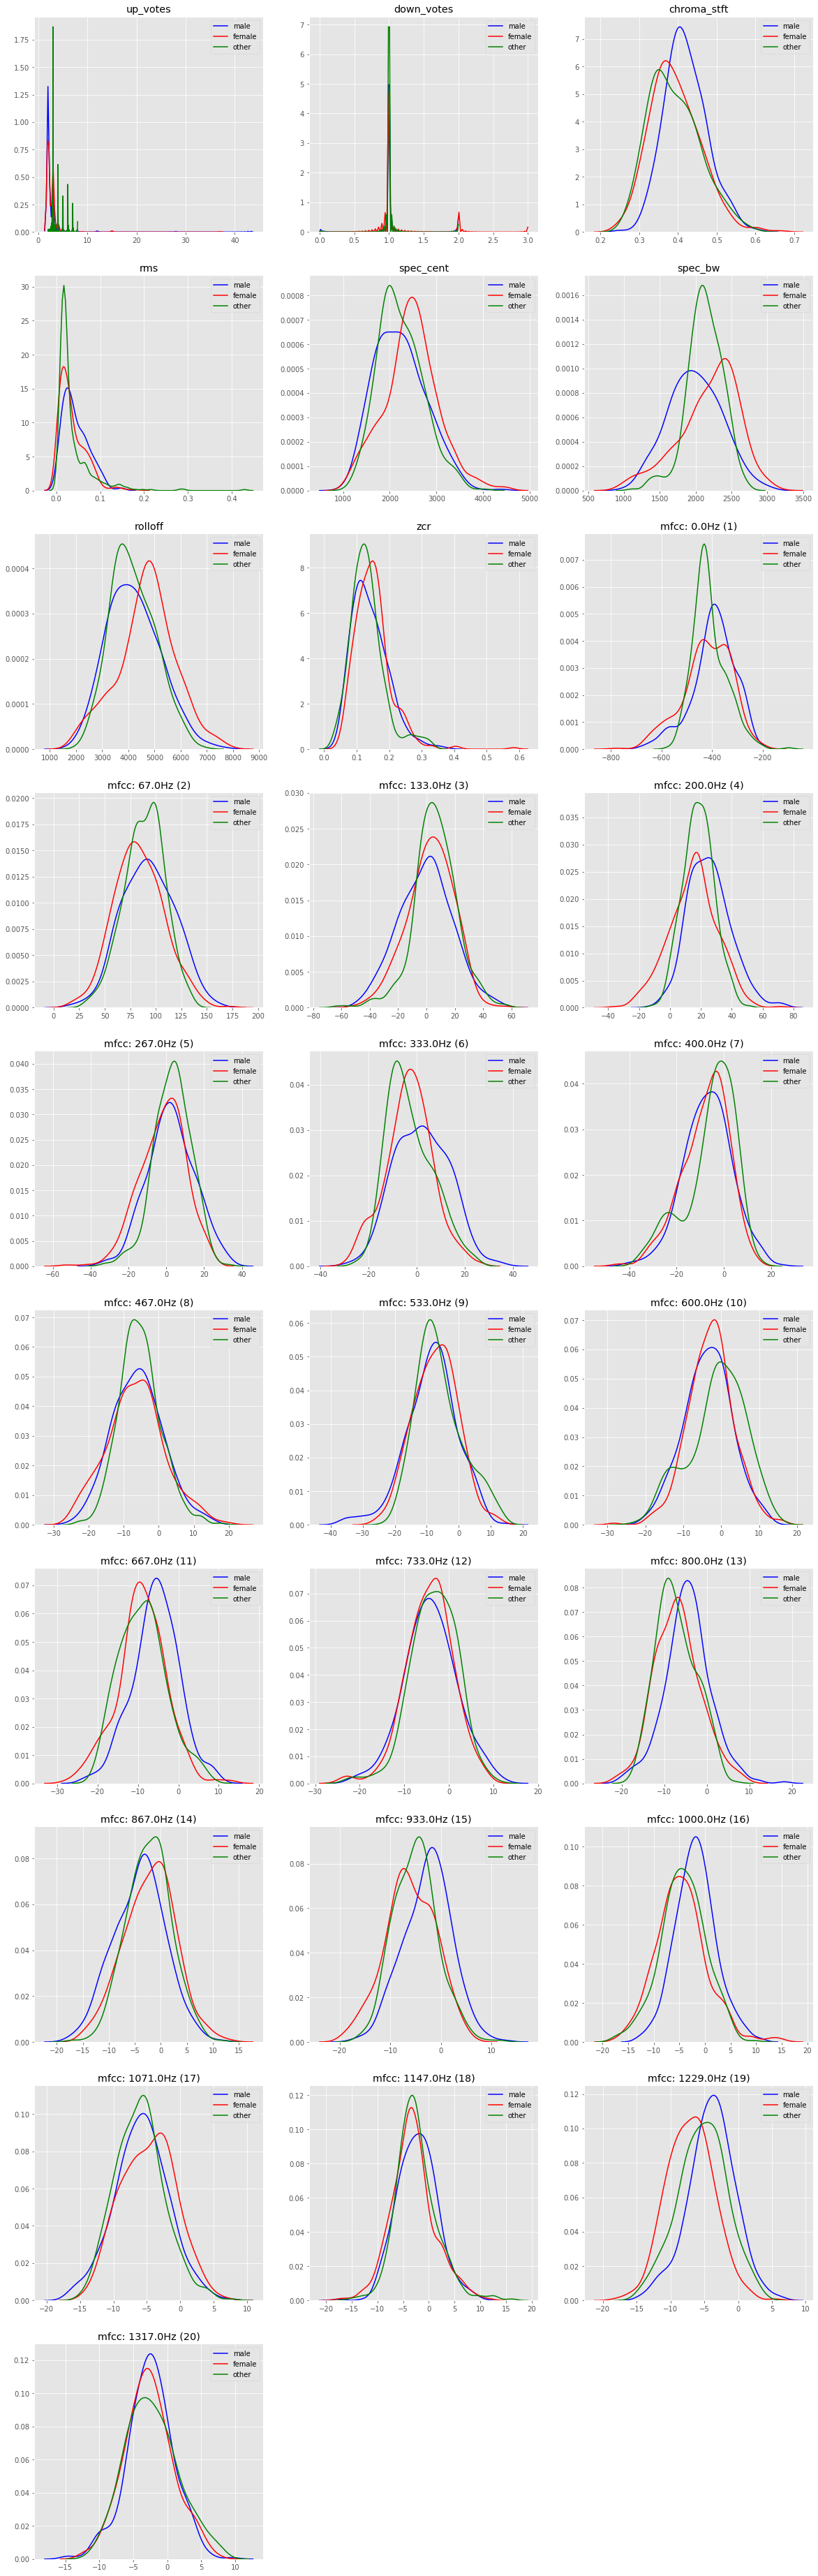

In [41]:
data = data_gender.copy()
data = data.drop(["path"],axis=1)
data = data.drop(["age"],axis=1)
data = data.drop(["accent"],axis=1)
plt.subplots(3,10,figsize=(20,67))
male_subset = data.loc[data["gender"] == "male"]
female_subset = data.loc[data["gender"]=="female"]
other_subset = data.loc[data["gender"]=="other"]
data = data.drop(["gender"],axis=1)
i = 1
for column in data.columns:
    plt.subplot(10,3,i)
    if column[0:4] == "mfcc":
        plt.title("mfcc: " + str(round(bin_freq[int(column[4:])])) + "Hz (" + column[4:] + ")")
    else:
        plt.title(column)
    sns.kdeplot(male_subset[column],color="blue",label="male")
    sns.kdeplot(female_subset[column],color="red",label="female")
    sns.kdeplot(other_subset[column],color="green",label="other")
    i += 1
plt.show()

# Creating some models and comparing them

In [262]:
def modelTester(name,model,features_train,features_test,target_train,target_test):
    fitted_model = model.fit(features_train,target_train)
    accuracy = accuracy_score(target_test,fitted_model.predict(features_test))
    print(name + " accuracy: " + str(accuracy))
    return fitted_model

In [263]:
#WORK IN PROGRESS - ROC (https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python)
def rocDisplayer(name,model,features_test,target_test):
    val = target_test.to_frame()
    probs = model.predict_proba(features_test)
    probs = probs[:,1]
    fpr,tpr,thresholds = metrics.roc_curve(val,probs,pos_label="male")
    roc_auc = metrics.auc(fpr, tpr)
    # ROC PLOT
    plt.title("ROC - " + name)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.show()

## Gender

In [264]:
df = data_gender.copy()
df

,up_votes,down_votes,path,age,gender,accent,chroma_stft,rms,spec_cent,spec_bw,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,2,0,data/wav_clips\common_voice_en_145869.wav,twenties,male,us,0.519508,0.046184,3120.186687,2369.889499,...,-9.317059,-3.653675,-4.392807,-1.631349,-1.214829,-7.194427,-7.210212,-0.178678,-4.438715,-3.594991
1,2,0,data/wav_clips\common_voice_en_15904748.wav,thirties,male,us,0.452745,0.017393,2507.242961,2372.888019,...,-10.072088,-3.961064,-4.224924,-5.156793,-3.291373,-3.662114,-6.509485,-2.047529,-3.279267,-4.830621
2,2,1,data/wav_clips\common_voice_en_112262.wav,thirties,male,england,0.445960,0.027786,2983.767058,2504.274788,...,-2.538711,6.921440,-8.535576,10.959559,-0.764142,2.681301,-6.194845,-5.372180,-3.860118,-2.197936
3,3,0,data/wav_clips\common_voice_en_107296.wav,sixties,male,canada,0.433444,0.025374,2315.148793,2354.208244,...,-4.111462,-2.708429,-2.487164,-3.274981,-9.413045,4.998079,-4.774955,-3.138991,-5.492332,-0.541001
4,3,0,data/wav_clips\common_voice_en_105712.wav,sixties,male,scotland,0.473905,0.064377,1284.836925,1627.445471,...,9.187879,1.240312,-6.278994,-1.805052,8.497016,5.377757,-6.727776,3.470864,-4.443211,7.271220
5,2,0,data/wav_clips\common_voice_en_106370.wav,fourties,male,scotland,0.413161,0.033782,1713.728255,1568.144916,...,0.494259,-7.456469,0.119218,-10.836387,-7.611642,0.759619,-5.304396,-2.770373,0.037188,-1.628192
6,2,0,data/wav_clips\common_voice_en_12724453.wav,thirties,male,england,0.388938,0.106080,3098.688201,1908.362497,...,-5.317585,-7.853055,-13.290706,-2.411669,2.667845,2.226767,-7.986133,7.797416,3.548270,-2.338170
7,2,0,data/wav_clips\common_voice_en_127988.wav,thirties,male,england,0.482988,0.018607,1717.572901,1910.658425,...,1.098214,2.840636,-5.180782,2.261322,-0.094496,1.926412,-3.811201,3.358814,-2.691064,-3.527568
8,2,0,data/wav_clips\common_voice_en_159092.wav,sixties,male,england,0.375548,0.053731,1722.670552,1499.188262,...,2.204926,-7.644915,0.117273,-16.872801,-3.350233,4.754080,-7.886878,-3.757821,-0.413919,3.063100
9,2,0,data/wav_clips\common_voice_en_15903532.wav,thirties,male,england,0.350278,0.012327,2191.057619,2153.666241,...,-6.151884,-12.349027,-5.980618,-6.890670,-2.902186,-8.043918,-7.437132,-7.401747,-5.928863,-5.054583


In [265]:
features = df.columns
features = features.drop(["up_votes","down_votes","path","age","gender","accent"])
features

Index(['chroma_stft', 'rms', 'spec_cent', 'spec_bw', 'rolloff', 'zcr', 'mfcc1',
       'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9',
       'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16',
       'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20'],
      dtype='object')

In [266]:
X_train, X_test, y_train, y_test = train_test_split(df[features],df.gender,train_size=0.7)

In [267]:
#Decision tree
dct = modelTester("Decision Tree",DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test)
dct

Decision Tree accuracy: 0.6129032258064516


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [268]:
#Random forest
rf = modelTester("Random forest",RandomForestClassifier(n_estimators=10000),X_train,X_test,y_train,y_test)
rf

Random forest accuracy: 0.8333333333333334


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
#SVM linear
svm_l = modelTester("SVM linear",SVC(kernel='linear',probability=True),X_train,X_test,y_train,y_test)
svm_l

SVM linear accuracy: 0.6854838709677419


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
# SVM POLY
#modelTester("SVM POLY",SVC(kernel='poly', degree=2 ,gamma='auto',probability=True),X_train,X_test,y_train,y_test)

In [ ]:
# SVM RBF
#modelTester("SVM RBF",SVC(kernel='rbf',gamma='auto',probability=True),X_train,X_test,y_train,y_test)

Which features were the most important in Random Forest

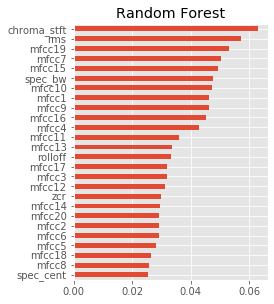

In [269]:
plt.subplots(figsize=(16, 16))
x = np.arange(-5,5,0.25)
y = np.arange(-5,5,0.25)
xx, yy = np.meshgrid(x, y)
df = pd.DataFrame({'x':xx.flatten(),'y':yy.flatten()})


feature_importances_rf = pd.Series(rf.feature_importances_, index= X_train.columns)
plt.subplot(3,4,1)
plt.title('Random Forest')
feature_importances_rf.sort_values().plot(kind='barh')

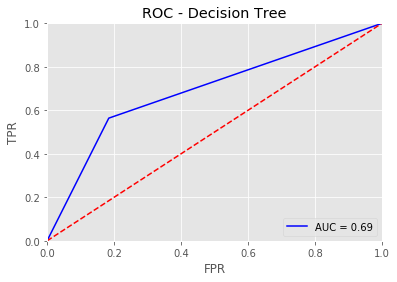

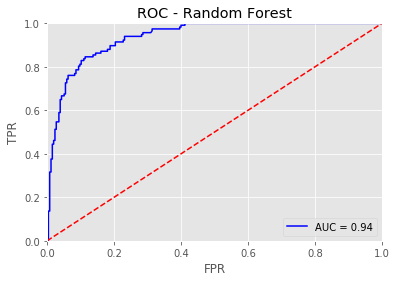

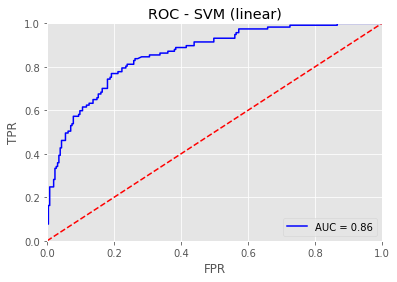

In [270]:
rocDisplayer("Decision Tree",dct,X_test,y_test)
rocDisplayer("Random Forest",rf,X_test,y_test)
rocDisplayer("SVM (linear)",svm_l,X_test,y_test)

# More gender prediction

Because there are not a lot of entries "other". We will remove them and that way we can get a lot more balanced data with just male and female entries.

In [271]:
df = pd.read_csv(output_pathname, encoding="utf-8", sep="\t")
dataGender = df.copy()
dataGender = dataGender[dataGender.gender != "other"]
dataGender = dataBalancer(dataGender,"gender",minimum_count)

features = dataGender.columns
features = features.drop(["up_votes","down_votes","path","age","gender","accent"])

X_train, X_test, y_train, y_test = train_test_split(dataGender[features],dataGender.gender,train_size=0.7)
#Decision tree
dct = modelTester("Decision Tree",DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test)
dct

Decision Tree accuracy: 0.8135788262370541


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [272]:
#Random forest
rf = modelTester("Random forest",RandomForestClassifier(n_estimators=1000),X_train,X_test,y_train,y_test)
rf

Random forest accuracy: 0.9165707710011507


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
#SVM linear
svm_l = modelTester("SVM linear",SVC(kernel='linear',probability=True),X_train,X_test,y_train,y_test)
svm_l

SVM linear accuracy: 0.812428078250863


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### We also have found audio features for an other language dataset. Lets see how the models perform on those.

In [273]:
def getAccuracy(filepath,rf,svm_l):
    data = pd.read_csv(filepath,encoding="utf-8",sep="\t")
    data = data[data.gender != "other"]
    y = data.gender
    X = data.drop(["path","age","gender","up_votes","down_votes","accent"],axis=1)
    return accuracy_score(y,rf.predict(X)), accuracy_score(y,svm_l.predict(X))

#### Estonian


In [274]:
accuracy_rf = []
accuracy_svm = []

dataEst = pd.read_csv("Datasets/Dataset_EST.csv")
y_est = dataEst.gender
X_est = dataEst.drop(["path","age","gender"],axis=1)
print("RF: "+str(accuracy_score(y_est,rf.predict(X_est))))
print("SVM: "+str(accuracy_score(y_est,svm_l.predict(X_est))))
accuracy_rf.append(accuracy_score(y_est,rf.predict(X_est)))
accuracy_svm.append(accuracy_score(y_est,svm_l.predict(X_est)))

RF: 0.8797127468581688
SVM: 0.8622490615309287


#### Russian


In [275]:
rf_ac,svm_ac = getAccuracy("Datasets/validated_ru_SpeechFeatures.tsv",rf,svm_l)
print("RF: "+str(rf_ac))
print("SVM: "+str(svm_ac))
accuracy_rf.append(rf_ac)
accuracy_svm.append(svm_ac)

RF: 0.897431790271771
SVM: 0.8724438037268407


#### Italian

In [276]:
rf_ac,svm_ac = getAccuracy("Datasets/validated_it_SpeechFeatures.tsv",rf,svm_l)
print("RF: "+str(rf_ac))
print("SVM: "+str(svm_ac))
accuracy_rf.append(rf_ac)
accuracy_svm.append(svm_ac)

RF: 0.8108612527312454
SVM: 0.8543790968681719


#### Swedish

In [277]:
rf_ac,svm_ac = getAccuracy("Datasets/validated_sv_SpeechFeatures.tsv",rf,svm_l)
print("RF: "+str(rf_ac))
print("SVM: "+str(svm_ac))
accuracy_rf.append(rf_ac)
accuracy_svm.append(svm_ac)

RF: 0.8895939086294417
SVM: 0.8464467005076142


#### Chinese (China) 

In [278]:
rf_ac,svm_ac = getAccuracy("Datasets/validated_zh_SpeechFeatures.tsv",rf,svm_l)
print("RF: "+str(rf_ac))
print("SVM: "+str(svm_ac))
accuracy_rf.append(rf_ac)
accuracy_svm.append(svm_ac)

RF: 0.9113539769277474
SVM: 0.8698643999190447


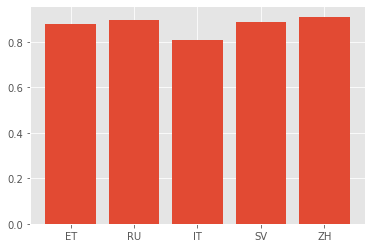

<BarContainer object of 5 artists>

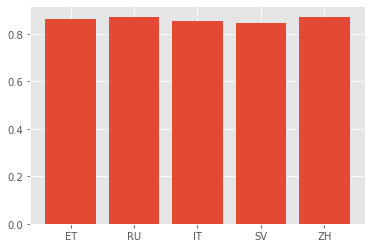

In [279]:
names = ["ET","RU","IT","SV","ZH"]
plt.bar(names,accuracy_rf)
plt.show()
plt.bar(names,accuracy_svm)

# Accent

In [43]:
df = data_accent.copy()
df

,up_votes,down_votes,path,age,gender,accent,chroma_stft,rms,spec_cent,spec_bw,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,3,0,data/wav_clips\common_voice_en_144144.wav,fifties,female,us,0.372672,0.151489,2728.304035,2220.255609,...,-1.695825,-11.331669,-20.853214,0.170711,-4.843570,-4.919557,-10.212312,-5.827789,-5.162388,-4.086193
1,2,0,data/wav_clips\common_voice_en_17952134.wav,fourties,female,us,0.394517,0.006353,1940.766009,2033.925023,...,-3.624849,-5.840228,-1.519965,14.566203,-9.558810,-10.338603,0.384548,6.415901,-7.049783,-0.831204
2,3,0,data/wav_clips\common_voice_en_134740.wav,thirties,male,us,0.462554,0.029256,2256.551755,1815.103089,...,-4.326765,-3.774089,-3.540220,-6.106414,-1.934812,-6.507878,-5.788809,-4.081395,-1.846933,-1.091156
3,2,0,data/wav_clips\common_voice_en_14824779.wav,fourties,male,us,0.452303,0.028105,2485.814288,2406.248195,...,0.208889,-5.586055,-5.190109,-3.391495,-1.771708,6.761003,-10.219092,-4.920169,-6.501205,1.101843
4,2,0,data/wav_clips\common_voice_en_16048555.wav,fourties,male,us,0.584526,0.025413,2587.515179,2052.109864,...,-1.757360,-4.548299,1.818056,-2.973128,-1.226042,1.560177,-2.591843,-3.135442,-0.476650,-2.162210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,3,0,data/wav_clips\common_voice_en_126447.wav,twenties,male,wales,0.352439,0.184444,1489.805832,1477.909708,...,-4.926450,-14.687705,4.919710,0.545352,-2.327174,-1.083614,0.851430,-9.714375,-9.248906,-6.429925
1452,3,0,data/wav_clips\common_voice_en_165552.wav,thirties,male,wales,0.460636,0.011345,2417.269206,2299.331287,...,-11.326574,-9.171270,-13.615711,-7.733407,-13.184601,-6.968382,-9.599207,-5.121739,-11.054449,-5.837081
1453,3,0,data/wav_clips\common_voice_en_136356.wav,twenties,male,wales,0.370326,0.020760,2179.731262,2126.061862,...,-2.204212,1.202502,-13.040638,6.239273,-2.952457,-5.021146,1.383187,-5.107875,-4.598287,-1.007226
1454,3,0,data/wav_clips\common_voice_en_136365.wav,twenties,male,wales,0.405415,0.028146,1884.706914,2032.887833,...,-0.009081,-0.508809,-15.365697,4.525563,-2.469296,-5.827573,-8.473411,-5.592183,-8.407540,-3.667971


In [44]:
features = df.columns
features = features.drop(["up_votes","down_votes","path","age","gender","accent"])

## 3 PCA

In [45]:
pca = PCA(n_components=3)
df_reduced = pd.DataFrame(pca.fit_transform(df[features].copy()))
df_reduced.insert(0,"accent",df["accent"],True)
df_reduced_3 = df_reduced.copy()

In [46]:
a = df_reduced["accent"].value_counts().iteritems()
groups = []
for index, value in a:
    groups.append(index)

super_colors = ["lightcoral","maroon","chocolate","gold","olive","greenyellow","darkseagreen","green","turquoise","dodgerblue","navy","darkorchid","darkmagenta"]
random.shuffle(super_colors)
colors = super_colors[:len(groups)]

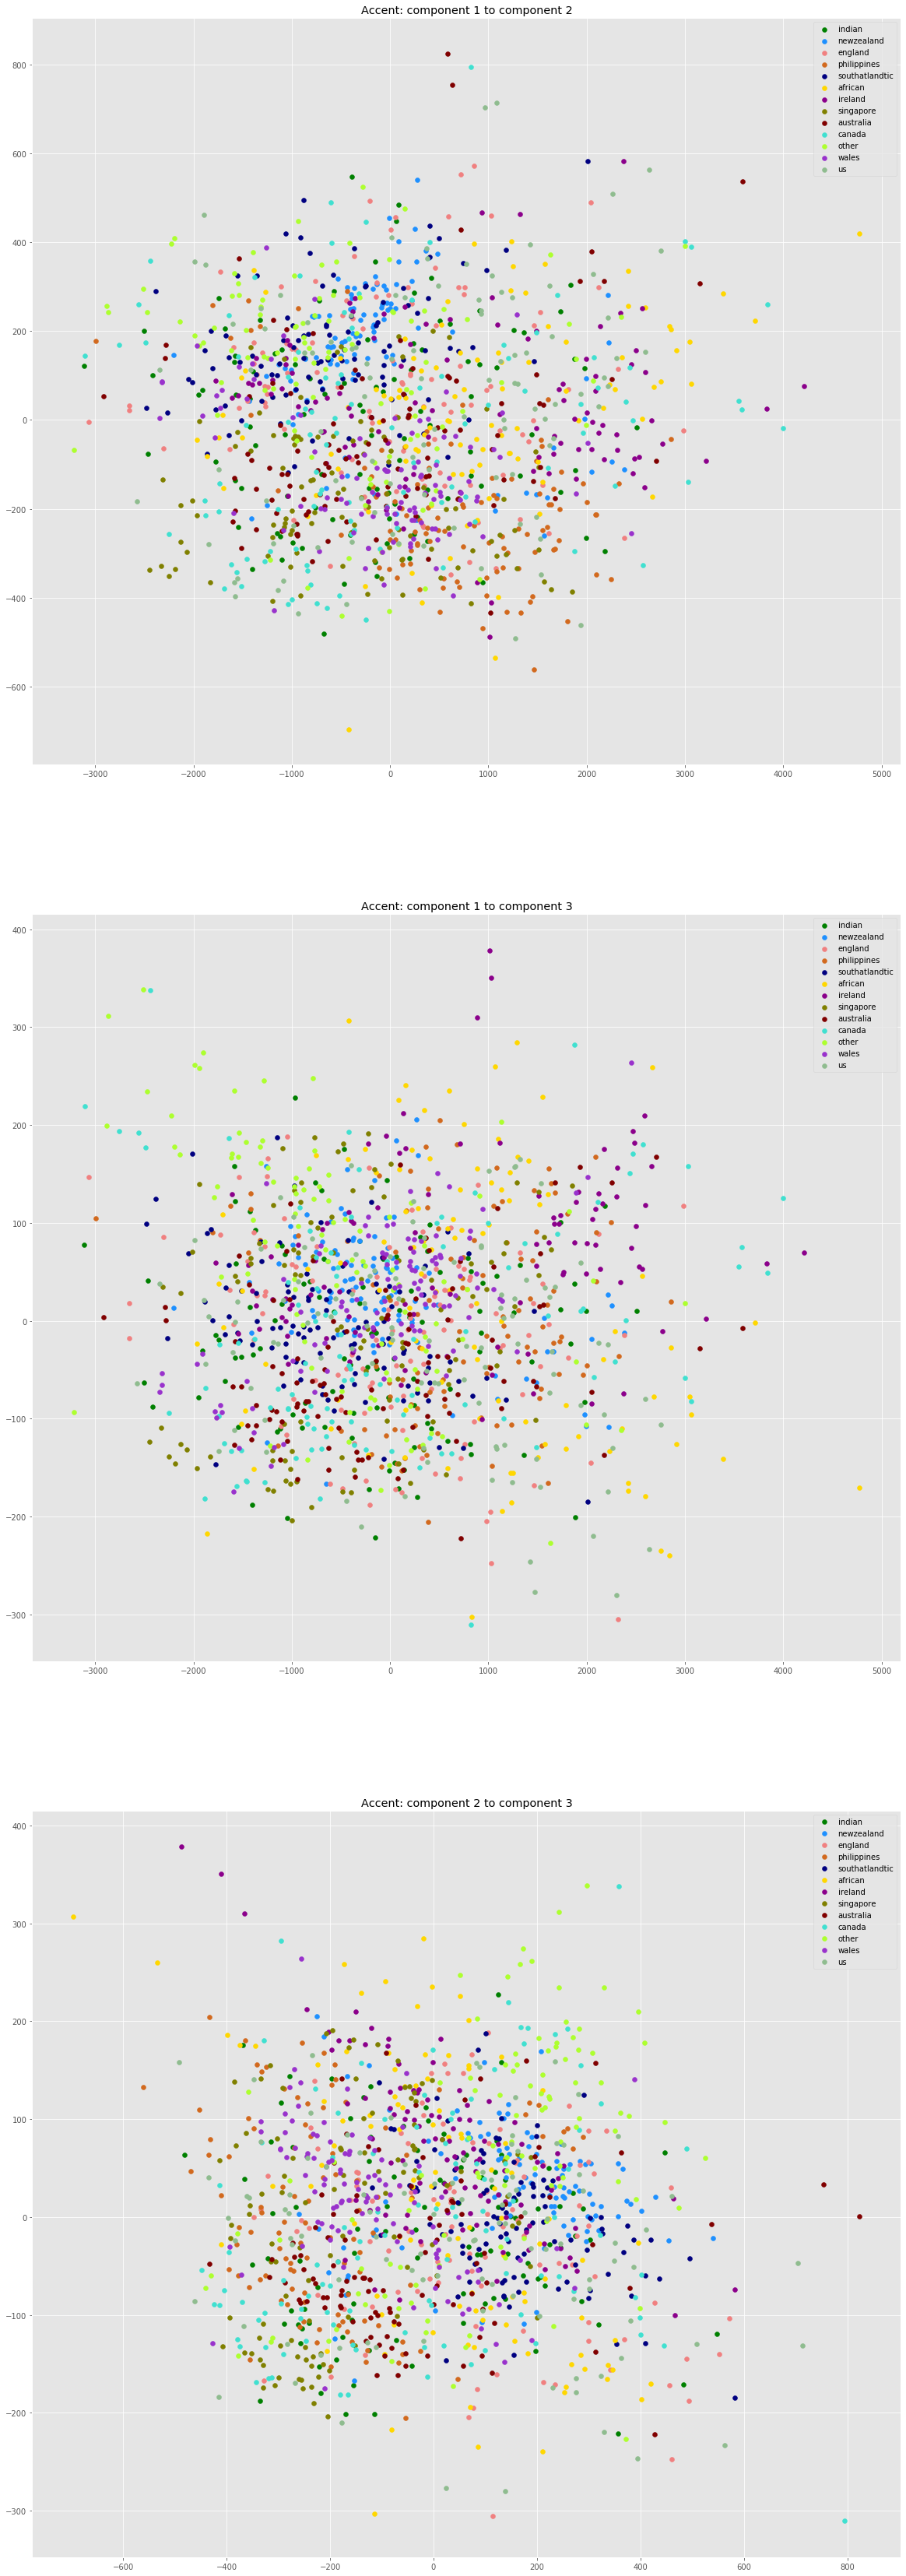

In [284]:
# Create plot
fig = plt.figure(figsize=(20,60))

ax = fig.add_subplot(311)
for color, group in zip(colors, groups):
    df_group = df_reduced[df_reduced["accent"] == group]
    xs = list(df_group[0])
    ys = list(df_group[1])
    ax.scatter(xs, ys, color=color)
ax.legend(groups)
plt.title('Accent: component 1 to component 2')

ax = fig.add_subplot(312)
for color, group in zip(colors, groups):
    df_group = df_reduced[df_reduced["accent"] == group]
    xs = list(df_group[0])
    zs = list(df_group[2])
    ax.scatter(xs, zs, color=color)
ax.legend(groups)
plt.title('Accent: component 1 to component 3')

ax = fig.add_subplot(313)
for color, group in zip(colors, groups):
    df_group = df_reduced[df_reduced["accent"] == group]
    ys = list(df_group[1])
    zs = list(df_group[2])
    ax.scatter(ys, zs, color=color)
ax.legend(groups)
plt.title('Accent: component 2 to component 3')
plt.show()

## 2PCA

In [285]:
pca = PCA(n_components=2)
df_reduced = pd.DataFrame(pca.fit_transform(df[features].copy()))
df_reduced.insert(0,"accent",df["accent"],True)
df_reduced_2 = df_reduced.copy()

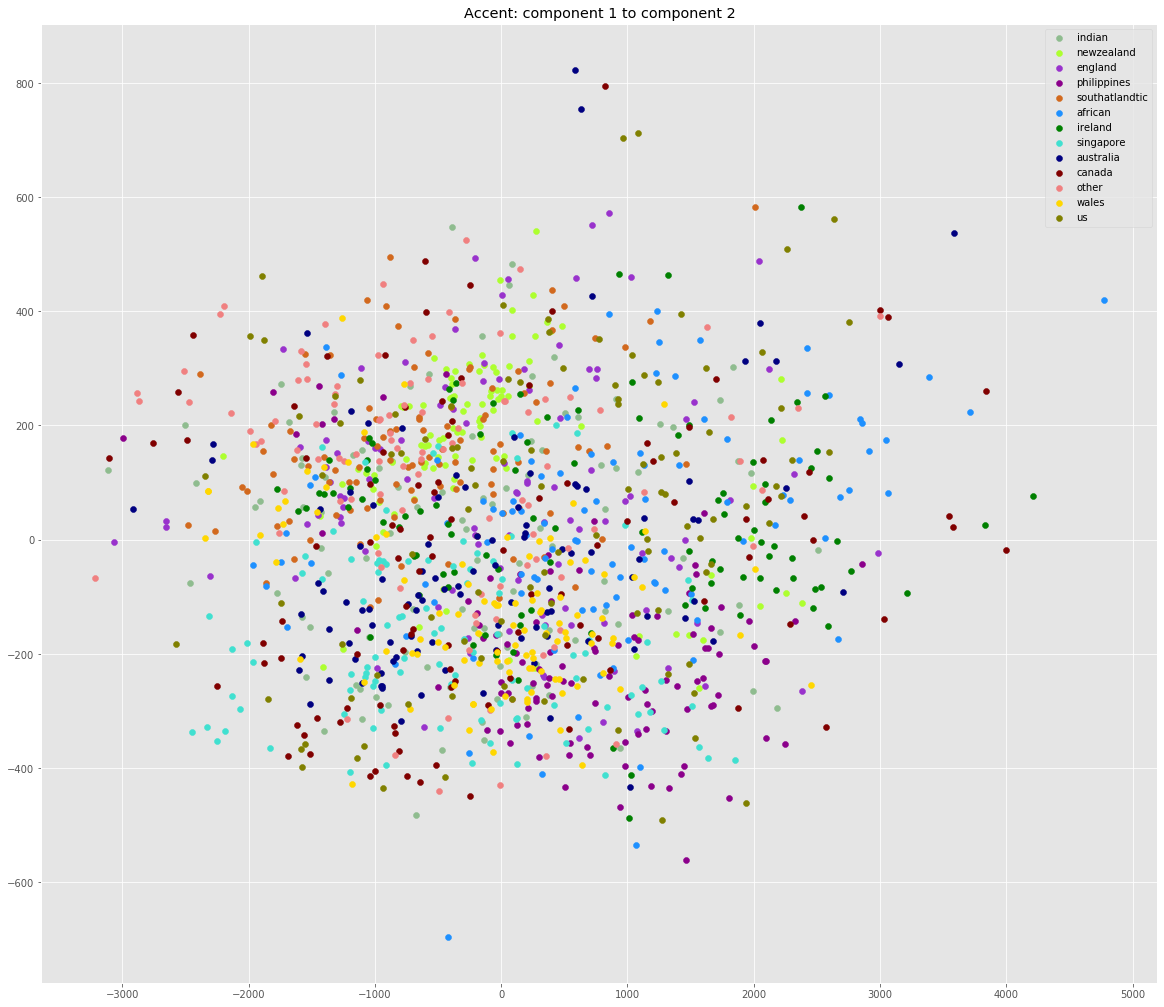

In [286]:
# Groups
a = df_reduced["accent"].value_counts().iteritems()
groups = []
for index, value in a:
    groups.append(index)

# Colors
super_colors = ["lightcoral","maroon","chocolate","gold","olive","greenyellow","darkseagreen","green","turquoise","dodgerblue","navy","darkorchid","darkmagenta"]
random.shuffle(super_colors)
colors = super_colors[:len(groups)]

# Create plot
fig = plt.figure(figsize=(20,60))

ax = fig.add_subplot(311)
for color, group in zip(colors, groups):
    df_group = df_reduced[df_reduced["accent"] == group]
    xs = list(df_group[0])
    ys = list(df_group[1])
    ax.scatter(xs, ys, color=color)
ax.legend(groups)
plt.title('Accent: component 1 to component 2')
plt.show()

### Classification

In [287]:
def tryClassifiersForData(data,do_dct,do_rf,do_svc,do_mlp):
    
    a = df_reduced["accent"].value_counts().iteritems()
    groups = []
    for index, value in a:
        groups.append(index)
    
    features = data.columns
    for f in ["up_votes","down_votes","path","age","gender","accent"]:
        if f in features:
            features = features.drop(f)
    
    X_train, X_test, y_train, y_test = train_test_split(data[features],data.accent,train_size=0.7)
    
    if (do_dct):
        dct = modelTester("Decision Tree",DecisionTreeClassifier(criterion='entropy'),X_train,X_test,y_train,y_test)
    if (do_rf):
        rf = modelTester("Random forest",RandomForestClassifier(n_estimators=10000),X_train,X_test,y_train,y_test)
    if (do_svc):
        svm_s = modelTester("SVC",SVC(kernel='rbf',shrinking=False,gamma="scale"),X_train,X_test,y_train,y_test)
    if (do_mlp):
        mlp = modelTester("MLPClassifier",MLPClassifier(),X_train,X_test,y_train,y_test)

In [288]:
tryClassifiersForData(df,1,0,1,1)

Decision Tree accuracy: 0.5240274599542334
SVC accuracy: 0.14874141876430205
MLPClassifier accuracy: 0.2448512585812357


In [289]:
tryClassifiersForData(df_reduced_3,1,0,1,1)

Decision Tree accuracy: 0.21967963386727687
SVC accuracy: 0.2654462242562929
MLPClassifier accuracy: 0.17620137299771166


In [290]:
tryClassifiersForData(df_reduced_2,1,0,1,1)

Decision Tree accuracy: 0.14645308924485126
SVC accuracy: 0.19679633867276888
MLPClassifier accuracy: 0.12585812356979406


# Neural Networks

In [170]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import SGD

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
def neural_network(hidden_size=5,learning_rate=0.1,momentum=0.9,weights=None):
    
    # One feature per sample
    x = Input((1,))

    # 5 hidden nodes with sigmoid as activation function
    h = Dense(hidden_size,activation='sigmoid',bias_initializer='random_uniform')(x)

    # One output with linear activation function.
    out = Dense(1,activation='linear',bias_initializer='random_uniform')(h)

    # Define a model
    model = Model(inputs=[x],outputs=[out])

    # Stochastic gradient descent with the specificed
    # learning rate and momentum.
    optimizer = SGD(lr=learning_rate,momentum=momentum)

    # Compile the model to generate the computation graph
    model.compile(optimizer=optimizer,loss='mse')
    if weights is not None:
        model.set_weights(weights)
        
    return model